In [50]:
import os
import os.path
import cv2
import glob
import imutils

CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"
OUTPUT_FOLDER = "extracted_letter_images"


# Get a list of all the captcha images we need to process
captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))
  #^^^^this command gives the path of folder we are trying to find
counts = {}

# loop over the image paths
for (i, captcha_image_file) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))

    # Since the filename contains the captcha text (i.e. "2A2X.png" has the text "2A2X"),
    # grab the base filename as the text
    filename = os.path.basename(captcha_image_file)
    captcha_correct_text = os.path.splitext(filename)[0]

    # Load the image and convert it to grayscale
    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Add some extra padding around the image
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    contours = contours[1] if imutils.is_cv3() else contours[0]

    letter_image_regions = []

    # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue

    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

    # Save out each letter as a single image
    for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_correct_text):
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image in
        save_path = os.path.join(OUTPUT_FOLDER, letter_text)

        # if the output directory does not exist, create it
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        # write the letter image to a file
        count = counts.get(letter_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[letter_text] = count + 1

[INFO] processing image 1/9945
[INFO] processing image 2/9945
[INFO] processing image 3/9945
[INFO] processing image 4/9945
[INFO] processing image 5/9945
[INFO] processing image 6/9945
[INFO] processing image 7/9945
[INFO] processing image 8/9945
[INFO] processing image 9/9945
[INFO] processing image 10/9945
[INFO] processing image 11/9945
[INFO] processing image 12/9945
[INFO] processing image 13/9945
[INFO] processing image 14/9945
[INFO] processing image 15/9945
[INFO] processing image 16/9945
[INFO] processing image 17/9945
[INFO] processing image 18/9945
[INFO] processing image 19/9945
[INFO] processing image 20/9945
[INFO] processing image 21/9945
[INFO] processing image 22/9945
[INFO] processing image 23/9945
[INFO] processing image 24/9945
[INFO] processing image 25/9945
[INFO] processing image 26/9945
[INFO] processing image 27/9945
[INFO] processing image 28/9945
[INFO] processing image 29/9945
[INFO] processing image 30/9945
[INFO] processing image 31/9945
[INFO] processing

[INFO] processing image 258/9945
[INFO] processing image 259/9945
[INFO] processing image 260/9945
[INFO] processing image 261/9945
[INFO] processing image 262/9945
[INFO] processing image 263/9945
[INFO] processing image 264/9945
[INFO] processing image 265/9945
[INFO] processing image 266/9945
[INFO] processing image 267/9945
[INFO] processing image 268/9945
[INFO] processing image 269/9945
[INFO] processing image 270/9945
[INFO] processing image 271/9945
[INFO] processing image 272/9945
[INFO] processing image 273/9945
[INFO] processing image 274/9945
[INFO] processing image 275/9945
[INFO] processing image 276/9945
[INFO] processing image 277/9945
[INFO] processing image 278/9945
[INFO] processing image 279/9945
[INFO] processing image 280/9945
[INFO] processing image 281/9945
[INFO] processing image 282/9945
[INFO] processing image 283/9945
[INFO] processing image 284/9945
[INFO] processing image 285/9945
[INFO] processing image 286/9945
[INFO] processing image 287/9945
[INFO] pro

[INFO] processing image 523/9945
[INFO] processing image 524/9945
[INFO] processing image 525/9945
[INFO] processing image 526/9945
[INFO] processing image 527/9945
[INFO] processing image 528/9945
[INFO] processing image 529/9945
[INFO] processing image 530/9945
[INFO] processing image 531/9945
[INFO] processing image 532/9945
[INFO] processing image 533/9945
[INFO] processing image 534/9945
[INFO] processing image 535/9945
[INFO] processing image 536/9945
[INFO] processing image 537/9945
[INFO] processing image 538/9945
[INFO] processing image 539/9945
[INFO] processing image 540/9945
[INFO] processing image 541/9945
[INFO] processing image 542/9945
[INFO] processing image 543/9945
[INFO] processing image 544/9945
[INFO] processing image 545/9945
[INFO] processing image 546/9945
[INFO] processing image 547/9945
[INFO] processing image 548/9945
[INFO] processing image 549/9945
[INFO] processing image 550/9945
[INFO] processing image 551/9945
[INFO] processing image 552/9945
[INFO] pro

[INFO] processing image 784/9945
[INFO] processing image 785/9945
[INFO] processing image 786/9945
[INFO] processing image 787/9945
[INFO] processing image 788/9945
[INFO] processing image 789/9945
[INFO] processing image 790/9945
[INFO] processing image 791/9945
[INFO] processing image 792/9945
[INFO] processing image 793/9945
[INFO] processing image 794/9945
[INFO] processing image 795/9945
[INFO] processing image 796/9945
[INFO] processing image 797/9945
[INFO] processing image 798/9945
[INFO] processing image 799/9945
[INFO] processing image 800/9945
[INFO] processing image 801/9945
[INFO] processing image 802/9945
[INFO] processing image 803/9945
[INFO] processing image 804/9945
[INFO] processing image 805/9945
[INFO] processing image 806/9945
[INFO] processing image 807/9945
[INFO] processing image 808/9945
[INFO] processing image 809/9945
[INFO] processing image 810/9945
[INFO] processing image 811/9945
[INFO] processing image 812/9945
[INFO] processing image 813/9945
[INFO] pro

[INFO] processing image 1037/9945
[INFO] processing image 1038/9945
[INFO] processing image 1039/9945
[INFO] processing image 1040/9945
[INFO] processing image 1041/9945
[INFO] processing image 1042/9945
[INFO] processing image 1043/9945
[INFO] processing image 1044/9945
[INFO] processing image 1045/9945
[INFO] processing image 1046/9945
[INFO] processing image 1047/9945
[INFO] processing image 1048/9945
[INFO] processing image 1049/9945
[INFO] processing image 1050/9945
[INFO] processing image 1051/9945
[INFO] processing image 1052/9945
[INFO] processing image 1053/9945
[INFO] processing image 1054/9945
[INFO] processing image 1055/9945
[INFO] processing image 1056/9945
[INFO] processing image 1057/9945
[INFO] processing image 1058/9945
[INFO] processing image 1059/9945
[INFO] processing image 1060/9945
[INFO] processing image 1061/9945
[INFO] processing image 1062/9945
[INFO] processing image 1063/9945
[INFO] processing image 1064/9945
[INFO] processing image 1065/9945
[INFO] process

[INFO] processing image 1293/9945
[INFO] processing image 1294/9945
[INFO] processing image 1295/9945
[INFO] processing image 1296/9945
[INFO] processing image 1297/9945
[INFO] processing image 1298/9945
[INFO] processing image 1299/9945
[INFO] processing image 1300/9945
[INFO] processing image 1301/9945
[INFO] processing image 1302/9945
[INFO] processing image 1303/9945
[INFO] processing image 1304/9945
[INFO] processing image 1305/9945
[INFO] processing image 1306/9945
[INFO] processing image 1307/9945
[INFO] processing image 1308/9945
[INFO] processing image 1309/9945
[INFO] processing image 1310/9945
[INFO] processing image 1311/9945
[INFO] processing image 1312/9945
[INFO] processing image 1313/9945
[INFO] processing image 1314/9945
[INFO] processing image 1315/9945
[INFO] processing image 1316/9945
[INFO] processing image 1317/9945
[INFO] processing image 1318/9945
[INFO] processing image 1319/9945
[INFO] processing image 1320/9945
[INFO] processing image 1321/9945
[INFO] process

[INFO] processing image 1543/9945
[INFO] processing image 1544/9945
[INFO] processing image 1545/9945
[INFO] processing image 1546/9945
[INFO] processing image 1547/9945
[INFO] processing image 1548/9945
[INFO] processing image 1549/9945
[INFO] processing image 1550/9945
[INFO] processing image 1551/9945
[INFO] processing image 1552/9945
[INFO] processing image 1553/9945
[INFO] processing image 1554/9945
[INFO] processing image 1555/9945
[INFO] processing image 1556/9945
[INFO] processing image 1557/9945
[INFO] processing image 1558/9945
[INFO] processing image 1559/9945
[INFO] processing image 1560/9945
[INFO] processing image 1561/9945
[INFO] processing image 1562/9945
[INFO] processing image 1563/9945
[INFO] processing image 1564/9945
[INFO] processing image 1565/9945
[INFO] processing image 1566/9945
[INFO] processing image 1567/9945
[INFO] processing image 1568/9945
[INFO] processing image 1569/9945
[INFO] processing image 1570/9945
[INFO] processing image 1571/9945
[INFO] process

[INFO] processing image 1792/9945
[INFO] processing image 1793/9945
[INFO] processing image 1794/9945
[INFO] processing image 1795/9945
[INFO] processing image 1796/9945
[INFO] processing image 1797/9945
[INFO] processing image 1798/9945
[INFO] processing image 1799/9945
[INFO] processing image 1800/9945
[INFO] processing image 1801/9945
[INFO] processing image 1802/9945
[INFO] processing image 1803/9945
[INFO] processing image 1804/9945
[INFO] processing image 1805/9945
[INFO] processing image 1806/9945
[INFO] processing image 1807/9945
[INFO] processing image 1808/9945
[INFO] processing image 1809/9945
[INFO] processing image 1810/9945
[INFO] processing image 1811/9945
[INFO] processing image 1812/9945
[INFO] processing image 1813/9945
[INFO] processing image 1814/9945
[INFO] processing image 1815/9945
[INFO] processing image 1816/9945
[INFO] processing image 1817/9945
[INFO] processing image 1818/9945
[INFO] processing image 1819/9945
[INFO] processing image 1820/9945
[INFO] process

[INFO] processing image 2054/9945
[INFO] processing image 2055/9945
[INFO] processing image 2056/9945
[INFO] processing image 2057/9945
[INFO] processing image 2058/9945
[INFO] processing image 2059/9945
[INFO] processing image 2060/9945
[INFO] processing image 2061/9945
[INFO] processing image 2062/9945
[INFO] processing image 2063/9945
[INFO] processing image 2064/9945
[INFO] processing image 2065/9945
[INFO] processing image 2066/9945
[INFO] processing image 2067/9945
[INFO] processing image 2068/9945
[INFO] processing image 2069/9945
[INFO] processing image 2070/9945
[INFO] processing image 2071/9945
[INFO] processing image 2072/9945
[INFO] processing image 2073/9945
[INFO] processing image 2074/9945
[INFO] processing image 2075/9945
[INFO] processing image 2076/9945
[INFO] processing image 2077/9945
[INFO] processing image 2078/9945
[INFO] processing image 2079/9945
[INFO] processing image 2080/9945
[INFO] processing image 2081/9945
[INFO] processing image 2082/9945
[INFO] process

[INFO] processing image 2307/9945
[INFO] processing image 2308/9945
[INFO] processing image 2309/9945
[INFO] processing image 2310/9945
[INFO] processing image 2311/9945
[INFO] processing image 2312/9945
[INFO] processing image 2313/9945
[INFO] processing image 2314/9945
[INFO] processing image 2315/9945
[INFO] processing image 2316/9945
[INFO] processing image 2317/9945
[INFO] processing image 2318/9945
[INFO] processing image 2319/9945
[INFO] processing image 2320/9945
[INFO] processing image 2321/9945
[INFO] processing image 2322/9945
[INFO] processing image 2323/9945
[INFO] processing image 2324/9945
[INFO] processing image 2325/9945
[INFO] processing image 2326/9945
[INFO] processing image 2327/9945
[INFO] processing image 2328/9945
[INFO] processing image 2329/9945
[INFO] processing image 2330/9945
[INFO] processing image 2331/9945
[INFO] processing image 2332/9945
[INFO] processing image 2333/9945
[INFO] processing image 2334/9945
[INFO] processing image 2335/9945
[INFO] process

[INFO] processing image 2551/9945
[INFO] processing image 2552/9945
[INFO] processing image 2553/9945
[INFO] processing image 2554/9945
[INFO] processing image 2555/9945
[INFO] processing image 2556/9945
[INFO] processing image 2557/9945
[INFO] processing image 2558/9945
[INFO] processing image 2559/9945
[INFO] processing image 2560/9945
[INFO] processing image 2561/9945
[INFO] processing image 2562/9945
[INFO] processing image 2563/9945
[INFO] processing image 2564/9945
[INFO] processing image 2565/9945
[INFO] processing image 2566/9945
[INFO] processing image 2567/9945
[INFO] processing image 2568/9945
[INFO] processing image 2569/9945
[INFO] processing image 2570/9945
[INFO] processing image 2571/9945
[INFO] processing image 2572/9945
[INFO] processing image 2573/9945
[INFO] processing image 2574/9945
[INFO] processing image 2575/9945
[INFO] processing image 2576/9945
[INFO] processing image 2577/9945
[INFO] processing image 2578/9945
[INFO] processing image 2579/9945
[INFO] process

[INFO] processing image 2799/9945
[INFO] processing image 2800/9945
[INFO] processing image 2801/9945
[INFO] processing image 2802/9945
[INFO] processing image 2803/9945
[INFO] processing image 2804/9945
[INFO] processing image 2805/9945
[INFO] processing image 2806/9945
[INFO] processing image 2807/9945
[INFO] processing image 2808/9945
[INFO] processing image 2809/9945
[INFO] processing image 2810/9945
[INFO] processing image 2811/9945
[INFO] processing image 2812/9945
[INFO] processing image 2813/9945
[INFO] processing image 2814/9945
[INFO] processing image 2815/9945
[INFO] processing image 2816/9945
[INFO] processing image 2817/9945
[INFO] processing image 2818/9945
[INFO] processing image 2819/9945
[INFO] processing image 2820/9945
[INFO] processing image 2821/9945
[INFO] processing image 2822/9945
[INFO] processing image 2823/9945
[INFO] processing image 2824/9945
[INFO] processing image 2825/9945
[INFO] processing image 2826/9945
[INFO] processing image 2827/9945
[INFO] process

[INFO] processing image 3054/9945
[INFO] processing image 3055/9945
[INFO] processing image 3056/9945
[INFO] processing image 3057/9945
[INFO] processing image 3058/9945
[INFO] processing image 3059/9945
[INFO] processing image 3060/9945
[INFO] processing image 3061/9945
[INFO] processing image 3062/9945
[INFO] processing image 3063/9945
[INFO] processing image 3064/9945
[INFO] processing image 3065/9945
[INFO] processing image 3066/9945
[INFO] processing image 3067/9945
[INFO] processing image 3068/9945
[INFO] processing image 3069/9945
[INFO] processing image 3070/9945
[INFO] processing image 3071/9945
[INFO] processing image 3072/9945
[INFO] processing image 3073/9945
[INFO] processing image 3074/9945
[INFO] processing image 3075/9945
[INFO] processing image 3076/9945
[INFO] processing image 3077/9945
[INFO] processing image 3078/9945
[INFO] processing image 3079/9945
[INFO] processing image 3080/9945
[INFO] processing image 3081/9945
[INFO] processing image 3082/9945
[INFO] process

[INFO] processing image 3305/9945
[INFO] processing image 3306/9945
[INFO] processing image 3307/9945
[INFO] processing image 3308/9945
[INFO] processing image 3309/9945
[INFO] processing image 3310/9945
[INFO] processing image 3311/9945
[INFO] processing image 3312/9945
[INFO] processing image 3313/9945
[INFO] processing image 3314/9945
[INFO] processing image 3315/9945
[INFO] processing image 3316/9945
[INFO] processing image 3317/9945
[INFO] processing image 3318/9945
[INFO] processing image 3319/9945
[INFO] processing image 3320/9945
[INFO] processing image 3321/9945
[INFO] processing image 3322/9945
[INFO] processing image 3323/9945
[INFO] processing image 3324/9945
[INFO] processing image 3325/9945
[INFO] processing image 3326/9945
[INFO] processing image 3327/9945
[INFO] processing image 3328/9945
[INFO] processing image 3329/9945
[INFO] processing image 3330/9945
[INFO] processing image 3331/9945
[INFO] processing image 3332/9945
[INFO] processing image 3333/9945
[INFO] process

[INFO] processing image 3552/9945
[INFO] processing image 3553/9945
[INFO] processing image 3554/9945
[INFO] processing image 3555/9945
[INFO] processing image 3556/9945
[INFO] processing image 3557/9945
[INFO] processing image 3558/9945
[INFO] processing image 3559/9945
[INFO] processing image 3560/9945
[INFO] processing image 3561/9945
[INFO] processing image 3562/9945
[INFO] processing image 3563/9945
[INFO] processing image 3564/9945
[INFO] processing image 3565/9945
[INFO] processing image 3566/9945
[INFO] processing image 3567/9945
[INFO] processing image 3568/9945
[INFO] processing image 3569/9945
[INFO] processing image 3570/9945
[INFO] processing image 3571/9945
[INFO] processing image 3572/9945
[INFO] processing image 3573/9945
[INFO] processing image 3574/9945
[INFO] processing image 3575/9945
[INFO] processing image 3576/9945
[INFO] processing image 3577/9945
[INFO] processing image 3578/9945
[INFO] processing image 3579/9945
[INFO] processing image 3580/9945
[INFO] process

[INFO] processing image 3813/9945
[INFO] processing image 3814/9945
[INFO] processing image 3815/9945
[INFO] processing image 3816/9945
[INFO] processing image 3817/9945
[INFO] processing image 3818/9945
[INFO] processing image 3819/9945
[INFO] processing image 3820/9945
[INFO] processing image 3821/9945
[INFO] processing image 3822/9945
[INFO] processing image 3823/9945
[INFO] processing image 3824/9945
[INFO] processing image 3825/9945
[INFO] processing image 3826/9945
[INFO] processing image 3827/9945
[INFO] processing image 3828/9945
[INFO] processing image 3829/9945
[INFO] processing image 3830/9945
[INFO] processing image 3831/9945
[INFO] processing image 3832/9945
[INFO] processing image 3833/9945
[INFO] processing image 3834/9945
[INFO] processing image 3835/9945
[INFO] processing image 3836/9945
[INFO] processing image 3837/9945
[INFO] processing image 3838/9945
[INFO] processing image 3839/9945
[INFO] processing image 3840/9945
[INFO] processing image 3841/9945
[INFO] process

[INFO] processing image 4066/9945
[INFO] processing image 4067/9945
[INFO] processing image 4068/9945
[INFO] processing image 4069/9945
[INFO] processing image 4070/9945
[INFO] processing image 4071/9945
[INFO] processing image 4072/9945
[INFO] processing image 4073/9945
[INFO] processing image 4074/9945
[INFO] processing image 4075/9945
[INFO] processing image 4076/9945
[INFO] processing image 4077/9945
[INFO] processing image 4078/9945
[INFO] processing image 4079/9945
[INFO] processing image 4080/9945
[INFO] processing image 4081/9945
[INFO] processing image 4082/9945
[INFO] processing image 4083/9945
[INFO] processing image 4084/9945
[INFO] processing image 4085/9945
[INFO] processing image 4086/9945
[INFO] processing image 4087/9945
[INFO] processing image 4088/9945
[INFO] processing image 4089/9945
[INFO] processing image 4090/9945
[INFO] processing image 4091/9945
[INFO] processing image 4092/9945
[INFO] processing image 4093/9945
[INFO] processing image 4094/9945
[INFO] process

[INFO] processing image 4338/9945
[INFO] processing image 4339/9945
[INFO] processing image 4340/9945
[INFO] processing image 4341/9945
[INFO] processing image 4342/9945
[INFO] processing image 4343/9945
[INFO] processing image 4344/9945
[INFO] processing image 4345/9945
[INFO] processing image 4346/9945
[INFO] processing image 4347/9945
[INFO] processing image 4348/9945
[INFO] processing image 4349/9945
[INFO] processing image 4350/9945
[INFO] processing image 4351/9945
[INFO] processing image 4352/9945
[INFO] processing image 4353/9945
[INFO] processing image 4354/9945
[INFO] processing image 4355/9945
[INFO] processing image 4356/9945
[INFO] processing image 4357/9945
[INFO] processing image 4358/9945
[INFO] processing image 4359/9945
[INFO] processing image 4360/9945
[INFO] processing image 4361/9945
[INFO] processing image 4362/9945
[INFO] processing image 4363/9945
[INFO] processing image 4364/9945
[INFO] processing image 4365/9945
[INFO] processing image 4366/9945
[INFO] process

[INFO] processing image 4595/9945
[INFO] processing image 4596/9945
[INFO] processing image 4597/9945
[INFO] processing image 4598/9945
[INFO] processing image 4599/9945
[INFO] processing image 4600/9945
[INFO] processing image 4601/9945
[INFO] processing image 4602/9945
[INFO] processing image 4603/9945
[INFO] processing image 4604/9945
[INFO] processing image 4605/9945
[INFO] processing image 4606/9945
[INFO] processing image 4607/9945
[INFO] processing image 4608/9945
[INFO] processing image 4609/9945
[INFO] processing image 4610/9945
[INFO] processing image 4611/9945
[INFO] processing image 4612/9945
[INFO] processing image 4613/9945
[INFO] processing image 4614/9945
[INFO] processing image 4615/9945
[INFO] processing image 4616/9945
[INFO] processing image 4617/9945
[INFO] processing image 4618/9945
[INFO] processing image 4619/9945
[INFO] processing image 4620/9945
[INFO] processing image 4621/9945
[INFO] processing image 4622/9945
[INFO] processing image 4623/9945
[INFO] process

[INFO] processing image 4837/9945
[INFO] processing image 4838/9945
[INFO] processing image 4839/9945
[INFO] processing image 4840/9945
[INFO] processing image 4841/9945
[INFO] processing image 4842/9945
[INFO] processing image 4843/9945
[INFO] processing image 4844/9945
[INFO] processing image 4845/9945
[INFO] processing image 4846/9945
[INFO] processing image 4847/9945
[INFO] processing image 4848/9945
[INFO] processing image 4849/9945
[INFO] processing image 4850/9945
[INFO] processing image 4851/9945
[INFO] processing image 4852/9945
[INFO] processing image 4853/9945
[INFO] processing image 4854/9945
[INFO] processing image 4855/9945
[INFO] processing image 4856/9945
[INFO] processing image 4857/9945
[INFO] processing image 4858/9945
[INFO] processing image 4859/9945
[INFO] processing image 4860/9945
[INFO] processing image 4861/9945
[INFO] processing image 4862/9945
[INFO] processing image 4863/9945
[INFO] processing image 4864/9945
[INFO] processing image 4865/9945
[INFO] process

[INFO] processing image 5092/9945
[INFO] processing image 5093/9945
[INFO] processing image 5094/9945
[INFO] processing image 5095/9945
[INFO] processing image 5096/9945
[INFO] processing image 5097/9945
[INFO] processing image 5098/9945
[INFO] processing image 5099/9945
[INFO] processing image 5100/9945
[INFO] processing image 5101/9945
[INFO] processing image 5102/9945
[INFO] processing image 5103/9945
[INFO] processing image 5104/9945
[INFO] processing image 5105/9945
[INFO] processing image 5106/9945
[INFO] processing image 5107/9945
[INFO] processing image 5108/9945
[INFO] processing image 5109/9945
[INFO] processing image 5110/9945
[INFO] processing image 5111/9945
[INFO] processing image 5112/9945
[INFO] processing image 5113/9945
[INFO] processing image 5114/9945
[INFO] processing image 5115/9945
[INFO] processing image 5116/9945
[INFO] processing image 5117/9945
[INFO] processing image 5118/9945
[INFO] processing image 5119/9945
[INFO] processing image 5120/9945
[INFO] process

[INFO] processing image 5352/9945
[INFO] processing image 5353/9945
[INFO] processing image 5354/9945
[INFO] processing image 5355/9945
[INFO] processing image 5356/9945
[INFO] processing image 5357/9945
[INFO] processing image 5358/9945
[INFO] processing image 5359/9945
[INFO] processing image 5360/9945
[INFO] processing image 5361/9945
[INFO] processing image 5362/9945
[INFO] processing image 5363/9945
[INFO] processing image 5364/9945
[INFO] processing image 5365/9945
[INFO] processing image 5366/9945
[INFO] processing image 5367/9945
[INFO] processing image 5368/9945
[INFO] processing image 5369/9945
[INFO] processing image 5370/9945
[INFO] processing image 5371/9945
[INFO] processing image 5372/9945
[INFO] processing image 5373/9945
[INFO] processing image 5374/9945
[INFO] processing image 5375/9945
[INFO] processing image 5376/9945
[INFO] processing image 5377/9945
[INFO] processing image 5378/9945
[INFO] processing image 5379/9945
[INFO] processing image 5380/9945
[INFO] process

[INFO] processing image 5626/9945
[INFO] processing image 5627/9945
[INFO] processing image 5628/9945
[INFO] processing image 5629/9945
[INFO] processing image 5630/9945
[INFO] processing image 5631/9945
[INFO] processing image 5632/9945
[INFO] processing image 5633/9945
[INFO] processing image 5634/9945
[INFO] processing image 5635/9945
[INFO] processing image 5636/9945
[INFO] processing image 5637/9945
[INFO] processing image 5638/9945
[INFO] processing image 5639/9945
[INFO] processing image 5640/9945
[INFO] processing image 5641/9945
[INFO] processing image 5642/9945
[INFO] processing image 5643/9945
[INFO] processing image 5644/9945
[INFO] processing image 5645/9945
[INFO] processing image 5646/9945
[INFO] processing image 5647/9945
[INFO] processing image 5648/9945
[INFO] processing image 5649/9945
[INFO] processing image 5650/9945
[INFO] processing image 5651/9945
[INFO] processing image 5652/9945
[INFO] processing image 5653/9945
[INFO] processing image 5654/9945
[INFO] process

[INFO] processing image 5870/9945
[INFO] processing image 5871/9945
[INFO] processing image 5872/9945
[INFO] processing image 5873/9945
[INFO] processing image 5874/9945
[INFO] processing image 5875/9945
[INFO] processing image 5876/9945
[INFO] processing image 5877/9945
[INFO] processing image 5878/9945
[INFO] processing image 5879/9945
[INFO] processing image 5880/9945
[INFO] processing image 5881/9945
[INFO] processing image 5882/9945
[INFO] processing image 5883/9945
[INFO] processing image 5884/9945
[INFO] processing image 5885/9945
[INFO] processing image 5886/9945
[INFO] processing image 5887/9945
[INFO] processing image 5888/9945
[INFO] processing image 5889/9945
[INFO] processing image 5890/9945
[INFO] processing image 5891/9945
[INFO] processing image 5892/9945
[INFO] processing image 5893/9945
[INFO] processing image 5894/9945
[INFO] processing image 5895/9945
[INFO] processing image 5896/9945
[INFO] processing image 5897/9945
[INFO] processing image 5898/9945
[INFO] process

[INFO] processing image 6126/9945
[INFO] processing image 6127/9945
[INFO] processing image 6128/9945
[INFO] processing image 6129/9945
[INFO] processing image 6130/9945
[INFO] processing image 6131/9945
[INFO] processing image 6132/9945
[INFO] processing image 6133/9945
[INFO] processing image 6134/9945
[INFO] processing image 6135/9945
[INFO] processing image 6136/9945
[INFO] processing image 6137/9945
[INFO] processing image 6138/9945
[INFO] processing image 6139/9945
[INFO] processing image 6140/9945
[INFO] processing image 6141/9945
[INFO] processing image 6142/9945
[INFO] processing image 6143/9945
[INFO] processing image 6144/9945
[INFO] processing image 6145/9945
[INFO] processing image 6146/9945
[INFO] processing image 6147/9945
[INFO] processing image 6148/9945
[INFO] processing image 6149/9945
[INFO] processing image 6150/9945
[INFO] processing image 6151/9945
[INFO] processing image 6152/9945
[INFO] processing image 6153/9945
[INFO] processing image 6154/9945
[INFO] process

[INFO] processing image 6386/9945
[INFO] processing image 6387/9945
[INFO] processing image 6388/9945
[INFO] processing image 6389/9945
[INFO] processing image 6390/9945
[INFO] processing image 6391/9945
[INFO] processing image 6392/9945
[INFO] processing image 6393/9945
[INFO] processing image 6394/9945
[INFO] processing image 6395/9945
[INFO] processing image 6396/9945
[INFO] processing image 6397/9945
[INFO] processing image 6398/9945
[INFO] processing image 6399/9945
[INFO] processing image 6400/9945
[INFO] processing image 6401/9945
[INFO] processing image 6402/9945
[INFO] processing image 6403/9945
[INFO] processing image 6404/9945
[INFO] processing image 6405/9945
[INFO] processing image 6406/9945
[INFO] processing image 6407/9945
[INFO] processing image 6408/9945
[INFO] processing image 6409/9945
[INFO] processing image 6410/9945
[INFO] processing image 6411/9945
[INFO] processing image 6412/9945
[INFO] processing image 6413/9945
[INFO] processing image 6414/9945
[INFO] process

[INFO] processing image 6643/9945
[INFO] processing image 6644/9945
[INFO] processing image 6645/9945
[INFO] processing image 6646/9945
[INFO] processing image 6647/9945
[INFO] processing image 6648/9945
[INFO] processing image 6649/9945
[INFO] processing image 6650/9945
[INFO] processing image 6651/9945
[INFO] processing image 6652/9945
[INFO] processing image 6653/9945
[INFO] processing image 6654/9945
[INFO] processing image 6655/9945
[INFO] processing image 6656/9945
[INFO] processing image 6657/9945
[INFO] processing image 6658/9945
[INFO] processing image 6659/9945
[INFO] processing image 6660/9945
[INFO] processing image 6661/9945
[INFO] processing image 6662/9945
[INFO] processing image 6663/9945
[INFO] processing image 6664/9945
[INFO] processing image 6665/9945
[INFO] processing image 6666/9945
[INFO] processing image 6667/9945
[INFO] processing image 6668/9945
[INFO] processing image 6669/9945
[INFO] processing image 6670/9945
[INFO] processing image 6671/9945
[INFO] process

[INFO] processing image 6909/9945
[INFO] processing image 6910/9945
[INFO] processing image 6911/9945
[INFO] processing image 6912/9945
[INFO] processing image 6913/9945
[INFO] processing image 6914/9945
[INFO] processing image 6915/9945
[INFO] processing image 6916/9945
[INFO] processing image 6917/9945
[INFO] processing image 6918/9945
[INFO] processing image 6919/9945
[INFO] processing image 6920/9945
[INFO] processing image 6921/9945
[INFO] processing image 6922/9945
[INFO] processing image 6923/9945
[INFO] processing image 6924/9945
[INFO] processing image 6925/9945
[INFO] processing image 6926/9945
[INFO] processing image 6927/9945
[INFO] processing image 6928/9945
[INFO] processing image 6929/9945
[INFO] processing image 6930/9945
[INFO] processing image 6931/9945
[INFO] processing image 6932/9945
[INFO] processing image 6933/9945
[INFO] processing image 6934/9945
[INFO] processing image 6935/9945
[INFO] processing image 6936/9945
[INFO] processing image 6937/9945
[INFO] process

[INFO] processing image 7158/9945
[INFO] processing image 7159/9945
[INFO] processing image 7160/9945
[INFO] processing image 7161/9945
[INFO] processing image 7162/9945
[INFO] processing image 7163/9945
[INFO] processing image 7164/9945
[INFO] processing image 7165/9945
[INFO] processing image 7166/9945
[INFO] processing image 7167/9945
[INFO] processing image 7168/9945
[INFO] processing image 7169/9945
[INFO] processing image 7170/9945
[INFO] processing image 7171/9945
[INFO] processing image 7172/9945
[INFO] processing image 7173/9945
[INFO] processing image 7174/9945
[INFO] processing image 7175/9945
[INFO] processing image 7176/9945
[INFO] processing image 7177/9945
[INFO] processing image 7178/9945
[INFO] processing image 7179/9945
[INFO] processing image 7180/9945
[INFO] processing image 7181/9945
[INFO] processing image 7182/9945
[INFO] processing image 7183/9945
[INFO] processing image 7184/9945
[INFO] processing image 7185/9945
[INFO] processing image 7186/9945
[INFO] process

[INFO] processing image 7402/9945
[INFO] processing image 7403/9945
[INFO] processing image 7404/9945
[INFO] processing image 7405/9945
[INFO] processing image 7406/9945
[INFO] processing image 7407/9945
[INFO] processing image 7408/9945
[INFO] processing image 7409/9945
[INFO] processing image 7410/9945
[INFO] processing image 7411/9945
[INFO] processing image 7412/9945
[INFO] processing image 7413/9945
[INFO] processing image 7414/9945
[INFO] processing image 7415/9945
[INFO] processing image 7416/9945
[INFO] processing image 7417/9945
[INFO] processing image 7418/9945
[INFO] processing image 7419/9945
[INFO] processing image 7420/9945
[INFO] processing image 7421/9945
[INFO] processing image 7422/9945
[INFO] processing image 7423/9945
[INFO] processing image 7424/9945
[INFO] processing image 7425/9945
[INFO] processing image 7426/9945
[INFO] processing image 7427/9945
[INFO] processing image 7428/9945
[INFO] processing image 7429/9945
[INFO] processing image 7430/9945
[INFO] process

[INFO] processing image 7655/9945
[INFO] processing image 7656/9945
[INFO] processing image 7657/9945
[INFO] processing image 7658/9945
[INFO] processing image 7659/9945
[INFO] processing image 7660/9945
[INFO] processing image 7661/9945
[INFO] processing image 7662/9945
[INFO] processing image 7663/9945
[INFO] processing image 7664/9945
[INFO] processing image 7665/9945
[INFO] processing image 7666/9945
[INFO] processing image 7667/9945
[INFO] processing image 7668/9945
[INFO] processing image 7669/9945
[INFO] processing image 7670/9945
[INFO] processing image 7671/9945
[INFO] processing image 7672/9945
[INFO] processing image 7673/9945
[INFO] processing image 7674/9945
[INFO] processing image 7675/9945
[INFO] processing image 7676/9945
[INFO] processing image 7677/9945
[INFO] processing image 7678/9945
[INFO] processing image 7679/9945
[INFO] processing image 7680/9945
[INFO] processing image 7681/9945
[INFO] processing image 7682/9945
[INFO] processing image 7683/9945
[INFO] process

[INFO] processing image 7898/9945
[INFO] processing image 7899/9945
[INFO] processing image 7900/9945
[INFO] processing image 7901/9945
[INFO] processing image 7902/9945
[INFO] processing image 7903/9945
[INFO] processing image 7904/9945
[INFO] processing image 7905/9945
[INFO] processing image 7906/9945
[INFO] processing image 7907/9945
[INFO] processing image 7908/9945
[INFO] processing image 7909/9945
[INFO] processing image 7910/9945
[INFO] processing image 7911/9945
[INFO] processing image 7912/9945
[INFO] processing image 7913/9945
[INFO] processing image 7914/9945
[INFO] processing image 7915/9945
[INFO] processing image 7916/9945
[INFO] processing image 7917/9945
[INFO] processing image 7918/9945
[INFO] processing image 7919/9945
[INFO] processing image 7920/9945
[INFO] processing image 7921/9945
[INFO] processing image 7922/9945
[INFO] processing image 7923/9945
[INFO] processing image 7924/9945
[INFO] processing image 7925/9945
[INFO] processing image 7926/9945
[INFO] process

[INFO] processing image 8146/9945
[INFO] processing image 8147/9945
[INFO] processing image 8148/9945
[INFO] processing image 8149/9945
[INFO] processing image 8150/9945
[INFO] processing image 8151/9945
[INFO] processing image 8152/9945
[INFO] processing image 8153/9945
[INFO] processing image 8154/9945
[INFO] processing image 8155/9945
[INFO] processing image 8156/9945
[INFO] processing image 8157/9945
[INFO] processing image 8158/9945
[INFO] processing image 8159/9945
[INFO] processing image 8160/9945
[INFO] processing image 8161/9945
[INFO] processing image 8162/9945
[INFO] processing image 8163/9945
[INFO] processing image 8164/9945
[INFO] processing image 8165/9945
[INFO] processing image 8166/9945
[INFO] processing image 8167/9945
[INFO] processing image 8168/9945
[INFO] processing image 8169/9945
[INFO] processing image 8170/9945
[INFO] processing image 8171/9945
[INFO] processing image 8172/9945
[INFO] processing image 8173/9945
[INFO] processing image 8174/9945
[INFO] process

[INFO] processing image 8397/9945
[INFO] processing image 8398/9945
[INFO] processing image 8399/9945
[INFO] processing image 8400/9945
[INFO] processing image 8401/9945
[INFO] processing image 8402/9945
[INFO] processing image 8403/9945
[INFO] processing image 8404/9945
[INFO] processing image 8405/9945
[INFO] processing image 8406/9945
[INFO] processing image 8407/9945
[INFO] processing image 8408/9945
[INFO] processing image 8409/9945
[INFO] processing image 8410/9945
[INFO] processing image 8411/9945
[INFO] processing image 8412/9945
[INFO] processing image 8413/9945
[INFO] processing image 8414/9945
[INFO] processing image 8415/9945
[INFO] processing image 8416/9945
[INFO] processing image 8417/9945
[INFO] processing image 8418/9945
[INFO] processing image 8419/9945
[INFO] processing image 8420/9945
[INFO] processing image 8421/9945
[INFO] processing image 8422/9945
[INFO] processing image 8423/9945
[INFO] processing image 8424/9945
[INFO] processing image 8425/9945
[INFO] process

[INFO] processing image 8639/9945
[INFO] processing image 8640/9945
[INFO] processing image 8641/9945
[INFO] processing image 8642/9945
[INFO] processing image 8643/9945
[INFO] processing image 8644/9945
[INFO] processing image 8645/9945
[INFO] processing image 8646/9945
[INFO] processing image 8647/9945
[INFO] processing image 8648/9945
[INFO] processing image 8649/9945
[INFO] processing image 8650/9945
[INFO] processing image 8651/9945
[INFO] processing image 8652/9945
[INFO] processing image 8653/9945
[INFO] processing image 8654/9945
[INFO] processing image 8655/9945
[INFO] processing image 8656/9945
[INFO] processing image 8657/9945
[INFO] processing image 8658/9945
[INFO] processing image 8659/9945
[INFO] processing image 8660/9945
[INFO] processing image 8661/9945
[INFO] processing image 8662/9945
[INFO] processing image 8663/9945
[INFO] processing image 8664/9945
[INFO] processing image 8665/9945
[INFO] processing image 8666/9945
[INFO] processing image 8667/9945
[INFO] process

[INFO] processing image 8888/9945
[INFO] processing image 8889/9945
[INFO] processing image 8890/9945
[INFO] processing image 8891/9945
[INFO] processing image 8892/9945
[INFO] processing image 8893/9945
[INFO] processing image 8894/9945
[INFO] processing image 8895/9945
[INFO] processing image 8896/9945
[INFO] processing image 8897/9945
[INFO] processing image 8898/9945
[INFO] processing image 8899/9945
[INFO] processing image 8900/9945
[INFO] processing image 8901/9945
[INFO] processing image 8902/9945
[INFO] processing image 8903/9945
[INFO] processing image 8904/9945
[INFO] processing image 8905/9945
[INFO] processing image 8906/9945
[INFO] processing image 8907/9945
[INFO] processing image 8908/9945
[INFO] processing image 8909/9945
[INFO] processing image 8910/9945
[INFO] processing image 8911/9945
[INFO] processing image 8912/9945
[INFO] processing image 8913/9945
[INFO] processing image 8914/9945
[INFO] processing image 8915/9945
[INFO] processing image 8916/9945
[INFO] process

[INFO] processing image 9159/9945
[INFO] processing image 9160/9945
[INFO] processing image 9161/9945
[INFO] processing image 9162/9945
[INFO] processing image 9163/9945
[INFO] processing image 9164/9945
[INFO] processing image 9165/9945
[INFO] processing image 9166/9945
[INFO] processing image 9167/9945
[INFO] processing image 9168/9945
[INFO] processing image 9169/9945
[INFO] processing image 9170/9945
[INFO] processing image 9171/9945
[INFO] processing image 9172/9945
[INFO] processing image 9173/9945
[INFO] processing image 9174/9945
[INFO] processing image 9175/9945
[INFO] processing image 9176/9945
[INFO] processing image 9177/9945
[INFO] processing image 9178/9945
[INFO] processing image 9179/9945
[INFO] processing image 9180/9945
[INFO] processing image 9181/9945
[INFO] processing image 9182/9945
[INFO] processing image 9183/9945
[INFO] processing image 9184/9945
[INFO] processing image 9185/9945
[INFO] processing image 9186/9945
[INFO] processing image 9187/9945
[INFO] process

[INFO] processing image 9414/9945
[INFO] processing image 9415/9945
[INFO] processing image 9416/9945
[INFO] processing image 9417/9945
[INFO] processing image 9418/9945
[INFO] processing image 9419/9945
[INFO] processing image 9420/9945
[INFO] processing image 9421/9945
[INFO] processing image 9422/9945
[INFO] processing image 9423/9945
[INFO] processing image 9424/9945
[INFO] processing image 9425/9945
[INFO] processing image 9426/9945
[INFO] processing image 9427/9945
[INFO] processing image 9428/9945
[INFO] processing image 9429/9945
[INFO] processing image 9430/9945
[INFO] processing image 9431/9945
[INFO] processing image 9432/9945
[INFO] processing image 9433/9945
[INFO] processing image 9434/9945
[INFO] processing image 9435/9945
[INFO] processing image 9436/9945
[INFO] processing image 9437/9945
[INFO] processing image 9438/9945
[INFO] processing image 9439/9945
[INFO] processing image 9440/9945
[INFO] processing image 9441/9945
[INFO] processing image 9442/9945
[INFO] process

[INFO] processing image 9663/9945
[INFO] processing image 9664/9945
[INFO] processing image 9665/9945
[INFO] processing image 9666/9945
[INFO] processing image 9667/9945
[INFO] processing image 9668/9945
[INFO] processing image 9669/9945
[INFO] processing image 9670/9945
[INFO] processing image 9671/9945
[INFO] processing image 9672/9945
[INFO] processing image 9673/9945
[INFO] processing image 9674/9945
[INFO] processing image 9675/9945
[INFO] processing image 9676/9945
[INFO] processing image 9677/9945
[INFO] processing image 9678/9945
[INFO] processing image 9679/9945
[INFO] processing image 9680/9945
[INFO] processing image 9681/9945
[INFO] processing image 9682/9945
[INFO] processing image 9683/9945
[INFO] processing image 9684/9945
[INFO] processing image 9685/9945
[INFO] processing image 9686/9945
[INFO] processing image 9687/9945
[INFO] processing image 9688/9945
[INFO] processing image 9689/9945
[INFO] processing image 9690/9945
[INFO] processing image 9691/9945
[INFO] process

[INFO] processing image 9913/9945
[INFO] processing image 9914/9945
[INFO] processing image 9915/9945
[INFO] processing image 9916/9945
[INFO] processing image 9917/9945
[INFO] processing image 9918/9945
[INFO] processing image 9919/9945
[INFO] processing image 9920/9945
[INFO] processing image 9921/9945
[INFO] processing image 9922/9945
[INFO] processing image 9923/9945
[INFO] processing image 9924/9945
[INFO] processing image 9925/9945
[INFO] processing image 9926/9945
[INFO] processing image 9927/9945
[INFO] processing image 9928/9945
[INFO] processing image 9929/9945
[INFO] processing image 9930/9945
[INFO] processing image 9931/9945
[INFO] processing image 9932/9945
[INFO] processing image 9933/9945
[INFO] processing image 9934/9945
[INFO] processing image 9935/9945
[INFO] processing image 9936/9945
[INFO] processing image 9937/9945
[INFO] processing image 9938/9945
[INFO] processing image 9939/9945
[INFO] processing image 9940/9945
[INFO] processing image 9941/9945
[INFO] process

In [51]:
#train_model.py
import cv2
import os.path
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

LETTER_IMAGES_FOLDER = "extracted_letter_images"

# initialize the data and labels
data = []
labels = []

# loop over the input images
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the letter so it fits in a 20x20 pixel box
    #image = resize_to_fit(image, 20, 20)
    image = cv2.resize(image,(20, 20))
    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)
    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]
    # Add the letter image and it's label to our training data
    data.append(image)
    labels.append(label)


# scale the raw pixel intensities to the range [0, 1] (this improves training)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split the training data into separate train and test sets
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)

# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(Y_train)
Y_train = lb.transform(Y_train)
Y_test = lb.transform(Y_test)    
    
model = models.Sequential([
    # First convolutional layer with max pooling
    layers.Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # Second convolutional layer with max pooling
    layers.Conv2D(50, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    # Hidden layer with 500 nodes
    layers.Flatten(),
    layers.Dense(500, activation="relu"),
    
    # Output layer with 32 nodes (one for each possible letter/number we predict)
    layers.Dense(32, activation="softmax")
])

# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the neural network
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)
# Save the trained model to disk
model.save(MODEL_FILENAME)
model.summary()

Epoch 1/10
908/908 [==============================] - 29s 31ms/step - loss: 0.2410 - accuracy: 0.9392 - val_loss: 0.0143 - val_accuracy: 0.9966
Epoch 2/10
908/908 [==============================] - 27s 30ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 0.0090 - val_accuracy: 0.9976
Epoch 3/10
908/908 [==============================] - 27s 30ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0142 - val_accuracy: 0.9945
Epoch 4/10
908/908 [==============================] - 28s 30ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0063 - val_accuracy: 0.9981
Epoch 5/10
908/908 [==============================] - 29s 32ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9989
Epoch 6/10
908/908 [==============================] - 32s 35ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0172 - val_accuracy: 0.9959
Epoch 7/10
908/908 [==============================] - 29s 32ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.0048 - val_accuracy:

CAPTCHA text is: 4DLG


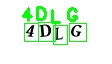

CAPTCHA text is: 3Z6B


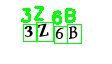

CAPTCHA text is: 4F5R


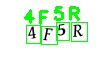

CAPTCHA text is: 4EET


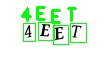

CAPTCHA text is: 4BWN


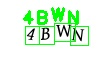

CAPTCHA text is: 3YKD


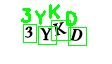

CAPTCHA text is: 4A8N


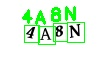

CAPTCHA text is: 5PR8


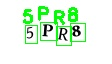

CAPTCHA text is: 4EDB


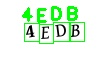

CAPTCHA text is: 3ZTR


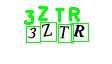

In [52]:
from tensorflow.keras.models import load_model
from imutils import paths
import numpy as np
import imutils
import cv2

CAPTCHA_IMAGE_FOLDER = "test"

captcha_image_files = list(paths.list_images(CAPTCHA_IMAGE_FOLDER))
captcha_image_files = np.random.choice(captcha_image_files, size=(10,), replace=False)

# loop over the image paths
for image_file in captcha_image_files:
    
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[1] if imutils.is_cv2() else contours[0]
    letter_image_regions = []

    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)
        if w / h > 1.25:
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))
    if len(letter_image_regions) != 4:
        continue

    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    output = cv2.merge([image] * 3)
    predictions = []

    for letter_bounding_box in letter_image_regions:
        
        x, y, w, h = letter_bounding_box
        letter_image = image[y-2:y+h+2, x-2:x+w+2]
        letter_image = resize_to_fit(letter_image, 20, 20)

        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)

        prediction = model.predict(letter_image)
        letter = lb.inverse_transform(prediction)[0]
        predictions.append(letter)

        cv2.rectangle(output, (x-2, y-2), (x+w+4, y+h+4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x-5, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)

    # Print the captcha's text
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))

    cv2.imwrite('workaround.jpg',output)
    from IPython.display import Image
    display(Image(filename='workaround.jpg'))